# Problem set 8: Mini-project

We've put some effort into building our collection (see problem set 7 for details and for links to texts and to metadata). Now it's time to learn something about it. You already have lots of excellent ideas for how to apply the tools we've learned about so far. It's also a good time of the semester to review what we have learned and practice applying it in less structured settings.

**You will work by yourself or in a group of up to three people** to complete a short project applying methods from the previous weeks to this collection. You will turn in the completed project as a single notebook (one submission per group) with the following sections:

1. **Question(s).** Describe what you wanted to learn. Suggest several possible answers or hypotheses, and describe in general terms what you might expect to see if each of these answers were true (save specific measurements for the next section). For example, many students want to know the difference between horror and non-horror, or between detective stories and horror fiction, but there are many ways to operationalize this question. You do not need to limit yourself to questions of genre. **Note that your question should be interesting! If the answer is obvious before you begin, or if it's something the importance of which you cannot explain, your grade will suffer (a lot).** (10 points)

1. **Methods.** Describe how you will use computational methods presented so far in this class to answer your question. What do the computational tools do, and how does their output relate to your question? Describe how you will process the collection into a form suitable for a model or algorithm and why you have processed it the way you have. (10 points)

1. **Code.** Carry out your experiments. Code should be correct (no errors) and focused (unneeded code from examples is removed). Use the notebook format effectively: code may be incorporated into multiple sections. (20 points)

1. **Results and discussion.** Use sorted lists, tables, and visual presentations to make your argument. Excellent projects will provide multiple views of results, and follow up on any apparent outliers or strange cases, including through careful reading of the original documents. (40 points)

1. **Reflection.** Describe your experience in this process. What was harder or easier than you expected? What compromises or negotiations did you have to accept to match the collection, the question, and the methods? What would you try next? (10 points)

1. **Responsibility and resources consulted.** Credit any online sources (Stack Overflow, blog posts, documentation) that you found helpful. (0 points, but -10 if missing)
    * **If you worked in a group**, set up a group submission in CMS. Each group member should submit (via CMS) a separate text file in which they describe each member's (including their own) contributions to the project.
    * Most people will turn in *either* a completed notebook for their solo project *or* a responsibility statement. The only people who will submit both files are those who are the designated submitter for their group. Don't worry if CMS warns you about a missing file (unless you're the group submitter).

Note that 10 points will be carried over from problem set 7.

**We will grade this work based on accuracy, thoroughness, creativity, reflectiveness, and quality of presentation.**

**Scope:** this is a *mini*-project, with a short deadline. We are expecting work that is consistent with that timeframe, but that is serious, thoughtful, and rigorous. This problem set will almost certainly require more time and effort than many of the others. **For group work, the expected scope grows linearly with the number of participants.**

# 0. Project team

List here the members of your project team, including yourself.

Joshua Hong (jh976)
Haokun Sun (hs932)
Frances Wang (xw568)

# 1. Question(s)

Controlling the genre (science fiction, horror, detective), adaptation , point of view and language, how is the sentiment score related to author's age, gender, war and [literature periods]((https://mc.libguides.com/eng/literaryperiods)) (Romantic (1790-1830), Victorian (1832-1901), Modern (1914-1945) and Post-Modern(1945-)). In particuliar, we want to check:

*  Do the authors write more positive words or negative words as they getting older?
*  Do female novelists use more positive words or negative words than male novelists?
*  Do the novels' sentiments change in war period?
*  In terms of the sentiment measure, is the non-classified literature period (1902-1913) closer to the Victorian (1832-1901) or the Modern Literature Period (1914-1945)?
*  What are important features in determining gender how accurately can we classify them?
*  How well does the clustering (k-means) perform? 


# 2. Methods

Sentiment Analysis with Emolex to get Sentiment Score


## Data Description:

We use the [metadata spreadsheet](https://docs.google.com/spreadsheets/d/1LHi_h4mrU8nK79vmErXOVC4EhphO0mBxsasgCTVMDf0/edit?usp=sharing) and [novel text documents](https://drive.google.com/drive/folders/1lbeZiBAVCzjCWojCK8mfmELa-Q8FMNUm?usp=sharing) provided from the INFO6350 PS7. To conduct our analysis, we make the following modifications on top of this database (we eliminate codes for these manual changes):

* We corrected typos for the 'year' variable of the following novels: Emma (1815), The Count of Monte Cristo (1844), Varney the Vampire (1845), Heidi (1880), Ghost Stories of an Antiquary (1904), Four Weird Tales (1912), Behind the Green Door (1940), All Cats Are Gray (1953), Voodoo Planet (1959) and Key out of Time (1963).

* We collected the birth year for each of the author and named the variable 'birth_year'. We the calculated the age of the author when publish the book ('year'-'birth_year'), named 'age'.

* We filled the missing 'adaptation' and 'wordcount' values for Minnie's Sacrifice, The Age of Innocence, The Shadow Over Innsmouth, The Paradise Mystery and The Sorcery Club.

* We created a dummy variable 'dScience'. 'dScience' = 1 if and only if the novel's genre includes science fiction.

* We removed several files that does not show on the excel or replicated, including The Works of Edgar Allan Poe - Volume 4, The Works of Edgar Allan Poe - Volume 5 and The Trial.

### Method for classification and clustering
* I want to use the classification methods as seen in class to see accuracy for determining gender. So, in order to fit the models and classifiers, I found the unique values of each column (I thought would be important for using as a feature) and gave them numerical values based on the index. Also, using the sentiment numbers, I put numerical values corresponding to the sentiments per novel onto the dataframe (data). This was done by creating columns with the value 0.0 (ex. data['anger'], etc.) and filling those columns up based on the sentiment scores found in the corpus_scores dictionary when the filename corresponded to the corpus_scores keys. Then I used 4 classifiers in order to see the accuracy of each model in predicting the target (gender). 

# 3. Code

In [1]:
# Imports (all of them!)
import pandas as pd
from pathlib import Path
import numpy as np
from glob import glob
import os
import string
from nltk import pos_tag 
from nltk.corpus import stopwords
from nltk import word_tokenize, sent_tokenize
from collections import defaultdict
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import TruncatedSVD
from sklearn.inspection import permutation_importance
from sklearn.ensemble import ExtraTreesClassifier
import nltk
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/joshuahong/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/joshuahong/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [21]:
#path = Path('..', '..', 'data', 'corpus_list.csv')
path = os.path.join('..', '..', 'data', 'Info6350_MiniP_data_v3.csv')
data = pd.read_csv(path)

# generate dummy variables for English, PovFirst, female, horror, detective and adaptation (1 if "True")

data["dHorror"] = data["horror"].astype(int)
data["dDetective"] = data["detective"].astype(int)
data["dAdaptation"] = data["adaptation"].astype(int)
data['dEnglish'] = np.where(data['language'] == 'en', 1, 0)
data['dPovFirst'] = np.where(data['pov'] == 'first', 1, 0)
data['dFemale'] = np.where(data['gender'] == 'female', 1, 0)

# convert all 'gb' to  'uk' 
data['country'] = data['country'].replace(['gb'],'uk')

# generate dummy variables for Romantic, Victorian, Modern and PostModern literature period (1 if "True")
data['dRomanticP'] = np.where((data['year'] >=  1790) & (data['year'] <= 1830), 1, 0)
data['dVictorianP'] = np.where((data['year'] >=  1832) & (data['year'] <= 1901), 1, 0)
data['dModernP'] = np.where((data['year'] >=  1914) & (data['year'] <= 1945), 1, 0)
data['dPostModernP'] = np.where((data['year'] >=  1945), 1, 0)

# generate dummy variables for FranceWar, USWar, UKWar, GermanyWar and War literature period (1 if the written was done during the writer's motherland war)
data['dFranceWar'] = np.where((data['year'] >=  1830) & (data['year'] <= 1848) & (data['country'] == 'fr'), 1, 0)
data['dUKWar'] = np.where((((data['year'] >=  1914) & (data['year'] <= 1918)) | ((data['year'] >=  1939) & (data['year'] <= 1945))) & (data['country'] == 'uk'), 1, 0)
data['dUSWar'] = np.where((((data['year'] >=  1914) & (data['year'] <= 1918)) | ((data['year'] >=  1939) & (data['year'] <= 1945)) | ((data['year'] >=  1861) & (data['year'] <= 1865))) & (data['country'] == 'us'), 1, 0)
data['dGermanyWar'] = np.where((((data['year'] >=  1914) & (data['year'] <= 1918)) | ((data['year'] >=  1939) & (data['year'] <= 1945))) & ((data['country'] == 'de') | (data['country'] == 'cz')), 1, 0)
data['dWar'] = np.where((data['dFranceWar'] ==  1) | (data['dUKWar'] ==  1)| (data['dUSWar'] ==  1)| (data['dGermanyWar'] ==  1), 1, 0)

for i in range(len(data)): # changing male = 1 & female = 0
    if data['gender'][i] == 'female':
        data['gender'][i] = 0
    elif data['gender'][i] == 'male': 
        data['gender'][i] = 1
        
# summary statistics for key variables
data[['wordcount', 'language', 'age', 'dScience', 'dHorror', 'dDetective', 'dAdaptation', 'dEnglish', 'dPovFirst', 'dFemale', 'dRomanticP', 'dVictorianP', 'dModernP', 'dPostModernP', 'dWar']].describe()  


<ipython-input-21-a10840089bee>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['gender'][i] = 0
<ipython-input-21-a10840089bee>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['gender'][i] = 1


,wordcount,age,dScience,dHorror,dDetective,dAdaptation,dEnglish,dPovFirst,dFemale,dRomanticP,dVictorianP,dModernP,dPostModernP,dWar
count,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000
mean,84949.242647,42.066176,0.213235,0.286765,0.250000,0.389706,0.985294,0.448529,0.522059,0.080882,0.330882,0.227941,0.147059,0.102941
std,76601.877438,10.888119,0.411107,0.453923,0.434613,0.489486,0.120818,0.499182,0.501360,0.273662,0.472270,0.421055,0.355474,0.305005
min,2764.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48454.250000,33.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,61812.500000,42.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102817.250000,48.250000,0.000000,1.000000,0.250000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,667000.000000,71.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
countries_list = list(data['country'].unique()) # finding unique values per columns I think are important
form_list = list(data['form'].unique())
language_list = list(data['language'].unique())
pov_list = list(data['pov'].unique())
for i in range(len(data)): # using index of the list of unique values to make values numeric since classification can't use strings in models
    data['country'][i] = countries_list.index(data['country'][i])
    data['form'][i] = form_list.index(data['form'][i])
    data['language'][i] = language_list.index(data['language'][i])
    data['pov'][i] = pov_list.index(data['pov'][i])

<ipython-input-22-45b112fd7bf9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['country'][i] = countries_list.index(data['country'][i])
<ipython-input-22-45b112fd7bf9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['form'][i] = form_list.index(data['form'][i])
<ipython-input-22-45b112fd7bf9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['language'][i] = language_list.index(data['language'][i])
<ipython-input-22-45

In [23]:
novel_files = glob(os.path.join('..', '..', 'data','novel', '*.txt'))
emolex_file = os.path.join('..', '..','data','lexicons','emolex.txt')

In [7]:
# novel_files = glob(os.path.join('/Users/francesw/desktop/info 6350','hw','texts', '*.txt'))
# emolex_file = os.path.join('/Users/francesw/desktop/info 6350','data','lexicons','emolex.txt')

In [8]:
# novel_files = glob(os.path.join('C:\\', 'Users', 'samsu', 'OneDrive', 'Documents', 'GitHub', 'info3350-f20', 'data', 'mini_project', 'novels', '*.txt'))
# emolex_file = os.path.join('C:\\', 'Users', 'samsu', 'OneDrive', 'Documents', 'GitHub', 'info3350-f20', 'data', 'mini_project', 'emolex.txt')

In [66]:
# Vader sentiment analysis 

def clean_text(text):
    text = text.lower()
    #tokenize text and remove punctuation 
    text = [word.strip(string.punctuation) for word in text.split(" ") ]
    #remove words that contain numbers 
    text = [word for word in text if not any(c.isdigit() for c in word)]
    #remove stop words 
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    #remove empty tokens 
    text = [t for t in text if len(t)>0]
    #pos tag text 
    pos_tags = pos_tag(text)
    #remove words with only one letter
    text = [t for t in text if len(t) > 1]
    #join all
    text = " ".join(text)
    return(text)

sid = SentimentIntensityAnalyzer()

for novel in novel_files: # Iterate over novels / encoding="ISO-8859-1"
    with open(novel, encoding="utf8",errors='ignore') as f: 
        novel_text = f.read() # Read a novel as a string
    novel_label = os.path.split(novel)[1].rstrip('.txt') # Get convenience label for novel
    tokens = clean_text(novel_text) # Tokenize
    print(sid.polarity_scores(tokens))

{'neg': 0.145, 'neu': 0.726, 'pos': 0.129, 'compound': -1.0}
{'neg': 0.099, 'neu': 0.723, 'pos': 0.178, 'compound': 1.0}
{'neg': 0.119, 'neu': 0.682, 'pos': 0.199, 'compound': 1.0}
{'neg': 0.115, 'neu': 0.737, 'pos': 0.147, 'compound': 1.0}
{'neg': 0.167, 'neu': 0.652, 'pos': 0.181, 'compound': 0.9999}
{'neg': 0.115, 'neu': 0.67, 'pos': 0.215, 'compound': 1.0}
{'neg': 0.149, 'neu': 0.675, 'pos': 0.176, 'compound': 0.9999}
{'neg': 0.123, 'neu': 0.707, 'pos': 0.17, 'compound': 1.0}
{'neg': 0.131, 'neu': 0.677, 'pos': 0.192, 'compound': 1.0}
{'neg': 0.09, 'neu': 0.683, 'pos': 0.227, 'compound': 1.0}
{'neg': 0.148, 'neu': 0.676, 'pos': 0.176, 'compound': 1.0}
{'neg': 0.108, 'neu': 0.719, 'pos': 0.173, 'compound': 1.0}
{'neg': 0.111, 'neu': 0.732, 'pos': 0.157, 'compound': 1.0}
{'neg': 0.175, 'neu': 0.644, 'pos': 0.181, 'compound': 0.999}
{'neg': 0.204, 'neu': 0.674, 'pos': 0.122, 'compound': -1.0}
{'neg': 0.128, 'neu': 0.715, 'pos': 0.156, 'compound': 1.0}
{'neg': 0.149, 'neu': 0.63, 'pos'

In [67]:
pd.DataFrame(sid.polarity_scores(tokens),index = ['neg','neu','pos'])

,neg,neu,pos,compound
neg,0.138,0.654,0.207,1.0
neu,0.138,0.654,0.207,1.0
pos,0.138,0.654,0.207,1.0


In [24]:
def compare_scores(scores_dict): # code from class 
    '''
    Takes a dictionary of cross_validate scores.
    Returns a color-coded Pandas dataframe that summarizes those scores.
    '''
    import pandas as pd
    df = pd.DataFrame(scores_dict).T.applymap(np.mean).style.background_gradient(cmap='RdYlGn')
    return df

In [25]:
#sentiment analysis using emolex provided from class

def tokenize_text(text, stopwords=None):
    '''
    Takes a string.
    Returns a list of tokenized sentences.
    '''
    tokenized_text = []
    for sent in sent_tokenize(text):
        tokens = word_tokenize(sent.lower())
        if stopwords != None:
            tokens = [token for token in tokens if token not in stopwords]
        tokenized_text.append(tokens)
    return tokenized_text

# Build stopword list with punctuation
stopwords = set(['and','but','am','is','are','was','were','be','being','been','the','a','an','of',
                'on','under','above','out','in','at','with','have','has','had', "'s"])
stopwords = stopwords.union(set(string.punctuation))


In [26]:
# read and parse the emolex file
def read_emolex(filepath=None):
    '''
    Takes a file path to the emolex lexicon file.
    Returns a dictionary of emolex sentiment values.
    '''
    if filepath==None: # Try to find the emolex file
        filepath = emolex_file
        if os.path.isfile(filepath):
            pass
        elif os.path.isfile('emolex.txt'):
            filepath = 'emolex.txt'
        else:
            raise FileNotFoundError('No EmoLex file found')
    emolex = defaultdict(dict) # Like Counter(), defaultdict eases dictionary creation
    with open(filepath, 'r') as f:
    # emolex file format is: word emotion value
        for line in f:
            word, emotion, value = line.strip().split()
            emolex[word][emotion] = int(value)
    return emolex

# Get EmoLex data
emolex = read_emolex(emolex_file)

In [27]:
# Sentiment scoring function
def sentiment_score(token_list, lex=None):
    '''
    Takes a tokenized sentence.
    Returns a dictionary of length-normalized EmoLex sentiment scores.
    '''
    if lex==None: # reading emolex everytime
        lex = read_emolex() 
    sent_score = { #making a dictionary with the scores and sentiments
  'anger': 0.0, 
  'anticipation': 0.0, 
  'disgust': 0.0, 
  'fear': 0.0, 
  'joy': 0.0, 
  'negative': 0.0, 
  'positive': 0.0, 
  'sadness': 0.0, 
  'surprise': 0.0, 
  'trust': 0.0
    }
    count = 0 
    for i, sent in enumerate(token_list): #so since we are not actually iterating through token list, we have to seperate each tokenized text into token list and index
        for x in sent: #so after seperating, we look at each token list 
            if x in emolex: # if an element in the list is in emolex 
                for y in sent_score: # we then iterate through our own dictionary we have (above)
                    sent_score[y] = sent_score[y] + emolex[x][y] #and we look at every element in our sent_score dict and update the scores based on the numbers in emolex[word][sentiment]
            count += 1 #this counts each sentence (can change, up to you, can indent again for every element)
    for i in sent_score: #you can comment this out to see the actual scores of each emotion (as in how many times each emotion is present)
        sent_score[i] = sent_score[i]/count #each score/count
    return(sent_score)

In [28]:
def visualize_emotion_scores(scores): #from class
    import pandas as pd
    import seaborn as sns
    df = pd.DataFrame.from_dict(scores)
    values = df.columns
    df = df.reset_index().melt(id_vars='index', value_vars=values, var_name='emotion').rename(columns={'index':'gender'})
    sns.set_context('poster')
    g = sns.catplot(x='gender', y='value', col='emotion', data=df, kind='bar', col_wrap=4)
    return g

In [29]:
%%time
corpus_scores = {} # Dictionary to hold results
for novel in novel_files: # Iterate over novels / encoding="ISO-8859-1"
    with open(novel, encoding="utf8",errors='ignore') as f: #ignoring any errors because it wouldn't matter since there are so many txts/novels
        novel_text = f.read() # Read a novel as a string
    novel_label = os.path.split(novel)[1] # Get convenience label for novel
    tokens = tokenize_text(novel_text) # Tokenize
#     for i, sent in enumerate(tokens):
    scores = sentiment_score(tokens,lex=emolex) # Score
    corpus_scores[novel_label] = scores # Record scores

CPU times: user 2min 35s, sys: 1.62 s, total: 2min 36s
Wall time: 2min 52s


In [30]:
corpus_scores

{'anthem 2.txt': {'anger': 0.011827859157492494,
  'anticipation': 0.01796924756619052,
  'disgust': 0.006004913110726959,
  'fear': 0.013738513329087435,
  'joy': 0.016740969884450913,
  'negative': 0.026066781912473844,
  'positive': 0.03766718224001456,
  'sadness': 0.01464834864889455,
  'surprise': 0.007233190792466563,
  'trust': 0.024974979528705303},
 'a_sweet_little_maid.txt': {'anger': 0.006179154560707124,
  'anticipation': 0.01929451241969145,
  'disgust': 0.004828743299095634,
  'fear': 0.00890043786062119,
  'joy': 0.017575807177640464,
  'negative': 0.01761672873102263,
  'positive': 0.03105945901706429,
  'sadness': 0.010332692228997013,
  'surprise': 0.00859352621025494,
  'trust': 0.020338012030936693},
 'The_Mysteries_of_Udolpho 2.txt': {'anger': 0.012379736446126487,
  'anticipation': 0.02006292462723998,
  'disgust': 0.007865578404997492,
  'fear': 0.018315968264101045,
  'joy': 0.017312822032739046,
  'negative': 0.03391888194792759,
  'positive': 0.04205234599425

In [31]:
data['anger'] = 0.0 #making columns in the dataframe
data['anticipation'] =0.0 
data['disgust'] =0.0 
data['fear'] =0.0 
data['joy'] =0.0 
data['negative'] =0.0 
data['positive'] =0.0 
data['sadness'] =0.0 
data['surprise'] =0.0 
data['trust'] =0.0 
sentiment_list = ['anger','anticipation', 'disgust', 'fear', 'joy', 'negative', 'positive', 'sadness', 'surprise', 'trust']
for i in corpus_scores: #iterating through corpus_scores (will give novel_name.txt)
    for x in range(len(data)): #iterating through data df using range(len) to index each row
        if i == data['filename'][x]: #if i (novel_name.txt) = data['filename'][row]
            for y in sentiment_list:  #iterate through sentiment_list ->
#                 print(corpus_scores[i])
                data[y][x] = corpus_scores[i][y] #so when data[row]['sentiment'] = corpus_scores[file_name.txt]['sentiment']

<ipython-input-31-9d42c258e302>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[y][x] = corpus_scores[i][y] #so when data[row]['sentiment'] = corpus_scores[file_name.txt]['sentiment']


In [32]:
data.head()

,owner,check_1,check_2,filename,title,author_surname,author_givenname,year,birth_year,genre,...,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,ks2373,aj445,jw2295,Little_Women_Alcott.txt,Little Women,Alcott,Louisa May,1868,1832,"comedy, children's literature",...,0.010340,0.027066,0.008799,0.012736,0.028709,0.028802,0.051807,0.016159,0.013963,0.028673
1,jh976,sml347,jcm497,The_Great_God_Pan.txt,The Great God Pan,Arthur,Machen,1894,1863,Horror,...,0.011352,0.019807,0.010686,0.018437,0.015540,0.030689,0.034055,0.017928,0.011195,0.023682
2,jz543,asc334,aml449,The_Lost_Kafoozalum.txt,The Lost Kafoozalum,Ashwell,Pauline,1960,1928,Science Fiction,...,0.009491,0.019563,0.006082,0.015418,0.009220,0.025335,0.030100,0.012977,0.008639,0.019563
3,yw458,sml347,me363,mansfield_park.txt,Mansfield Park,Austen,Jane,1814,1775,"romance, historical",...,0.009017,0.025265,0.006784,0.012423,0.022607,0.024807,0.050260,0.012880,0.011250,0.029703
4,kjk248,ay329,jcm497,pride_and_prejudice.txt,Pride and Prejudice,Austen,Jane,1813,1775,"fiction, romance",...,0.008587,0.024625,0.006419,0.011948,0.022899,0.024843,0.051194,0.011927,0.011344,0.029052


In [33]:
# OLS Regression
#data.to_csv(r'C:\Users\samsu\OneDrive\Documents\GitHub\info3350-f20\data\mini_project\Info6350_MiniP_data_output.csv', index = False, header=True)


x_1 = data[['age', 'dFemale', 'dRomanticP', 'dVictorianP', 'dModernP', 'dPostModernP', 'dScience', 'dHorror', 'dDetective' ,  'dAdaptation', 'dPovFirst', 'dEnglish']]
x_2 = data[['age', 'dFemale', 'dWar', 'dRomanticP', 'dVictorianP', 'dModernP', 'dPostModernP', 'dScience', 'dHorror', 'dDetective' , 'dAdaptation', 'dPovFirst', 'dEnglish']]
y_positive = data['positive']
y_positive = y_positive.astype(float)
y_anticipation = data['anticipation']
y_anticipation = y_anticipation.astype(float)
y_joy = data['joy']
y_joy = y_joy.astype(float)
y_trust = data['trust']
y_trust = y_trust.astype(float)
y_surprise = data['surprise']
y_surprise = y_surprise.astype(float)
y_fear = data['fear']
y_fear = y_fear.astype(float)

# positive
lin_model=sm.OLS(y_positive,x_1.astype(float)) #linear regression model
positive_1 =lin_model.fit() 
print(positive_1.summary())

lin_model=sm.OLS(y_positive,x_2.astype(float)) #linear regression model
positive_2 =lin_model.fit() 
print(positive_2.summary())

                                 OLS Regression Results                                
Dep. Variable:               positive   R-squared (uncentered):                   0.948
Model:                            OLS   Adj. R-squared (uncentered):              0.943
Method:                 Least Squares   F-statistic:                              187.3
Date:                Tue, 27 Oct 2020   Prob (F-statistic):                    2.60e-73
Time:                        17:01:34   Log-Likelihood:                          453.86
No. Observations:                 136   AIC:                                     -883.7
Df Residuals:                     124   BIC:                                     -848.8
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [34]:
# anticipation

lin_model=sm.OLS(y_anticipation,x_1.astype(float)) #linear regression model
anticipation_1 =lin_model.fit() 
print(anticipation_1.summary())

lin_model=sm.OLS(y_anticipation,x_2.astype(float)) #linear regression model
anticipation_2 =lin_model.fit() 
print(anticipation_2.summary())

                                 OLS Regression Results                                
Dep. Variable:           anticipation   R-squared (uncentered):                   0.952
Model:                            OLS   Adj. R-squared (uncentered):              0.948
Method:                 Least Squares   F-statistic:                              206.1
Date:                Tue, 27 Oct 2020   Prob (F-statistic):                    9.44e-76
Time:                        17:01:38   Log-Likelihood:                          551.74
No. Observations:                 136   AIC:                                     -1079.
Df Residuals:                     124   BIC:                                     -1045.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [35]:
# joy
lin_model=sm.OLS(y_joy,x_1.astype(float)) #linear regression model
joy_1 =lin_model.fit() 
print(joy_1.summary())

lin_model=sm.OLS(y_joy,x_2.astype(float)) #linear regression model
joy_2 =lin_model.fit() 
print(joy_2.summary())

                                 OLS Regression Results                                
Dep. Variable:                    joy   R-squared (uncentered):                   0.936
Model:                            OLS   Adj. R-squared (uncentered):              0.930
Method:                 Least Squares   F-statistic:                              152.2
Date:                Tue, 27 Oct 2020   Prob (F-statistic):                    4.51e-68
Time:                        17:01:39   Log-Likelihood:                          557.91
No. Observations:                 136   AIC:                                     -1092.
Df Residuals:                     124   BIC:                                     -1057.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [36]:
# trust
lin_model=sm.OLS(y_trust,x_1.astype(float)) #linear regression model
trust_1 =lin_model.fit() 
print(trust_1.summary())

lin_model=sm.OLS(y_trust,x_2.astype(float)) #linear regression model
trust_2 =lin_model.fit() 
print(trust_2.summary())

                                 OLS Regression Results                                
Dep. Variable:                  trust   R-squared (uncentered):                   0.945
Model:                            OLS   Adj. R-squared (uncentered):              0.940
Method:                 Least Squares   F-statistic:                              178.7
Date:                Tue, 27 Oct 2020   Prob (F-statistic):                    4.06e-72
Time:                        17:01:40   Log-Likelihood:                          520.09
No. Observations:                 136   AIC:                                     -1016.
Df Residuals:                     124   BIC:                                     -981.2
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [37]:
# surprise
lin_model=sm.OLS(y_surprise,x_1.astype(float)) #linear regression model
surprise_1 =lin_model.fit() 
print(surprise_1.summary())

lin_model=sm.OLS(y_surprise,x_2.astype(float)) #linear regression model
surprise_2 =lin_model.fit() 
print(surprise_2.summary())

                                 OLS Regression Results                                
Dep. Variable:               surprise   R-squared (uncentered):                   0.948
Model:                            OLS   Adj. R-squared (uncentered):              0.943
Method:                 Least Squares   F-statistic:                              189.1
Date:                Tue, 27 Oct 2020   Prob (F-statistic):                    1.49e-73
Time:                        17:01:40   Log-Likelihood:                          635.77
No. Observations:                 136   AIC:                                     -1248.
Df Residuals:                     124   BIC:                                     -1213.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [38]:
# fear
lin_model=sm.OLS(y_fear,x_1.astype(float)) #linear regression model
fear_1 =lin_model.fit() 
print(fear_1.summary())

lin_model=sm.OLS(y_fear,x_2.astype(float)) #linear regression model
fear_2 =lin_model.fit() 
print(fear_2.summary())

                                 OLS Regression Results                                
Dep. Variable:                   fear   R-squared (uncentered):                   0.912
Model:                            OLS   Adj. R-squared (uncentered):              0.903
Method:                 Least Squares   F-statistic:                              106.8
Date:                Tue, 27 Oct 2020   Prob (F-statistic):                    2.63e-59
Time:                        17:01:41   Log-Likelihood:                          527.69
No. Observations:                 136   AIC:                                     -1031.
Df Residuals:                     124   BIC:                                     -996.4
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [39]:
M_author = [] #making lists for titles written by male or female authors 
F_author = []
for i in range(len(data)): #iterating through range(len(data))
    if data['gender'][i] == 1: #appending all titles when gender = 1 to M_author list
        M_author.append(data['title'][i])
    else:
        F_author.append(data['title'][i]) #appending all titles when gender = 0 to F_author list

M_dict = defaultdict(lambda:0) #creating dictionaries to hold sentiments per author lists
F_dict = defaultdict(lambda:0)
for i in range(len(data)): #iterating through each title when it is found in M_author or F_author and adding its sentiment scores in the dictionary from above
    for x in M_author:
        if x == data['title'][i]: 
            for y in sentiment_list:
                M_dict[y] = M_dict[y] + data[y][i]
    for a in F_author: 
        if a == data['title'][i]: 
            for y in sentiment_list:
                F_dict[y] = F_dict[y] + data[y][i]
for y in sentiment_list: #dividing each dictionary sentiment value by the amount of books in each dictionary (normalizing- might be a better way to do this)
    M_dict[y] = M_dict[y]/len(M_author)
    F_dict[y] = F_dict[y]/len(F_author)
    
final_dict = defaultdict(lambda: defaultdict(list)) #similar to gendered sentiment from class, but basically putting the normalized values of each sentiment
#as M_author & F_author per sentiment- so what i mean is doing this ex. {anger: [m_author:0.0, f_author:0.0]}
for i in sentiment_list:
    final_dict[i]['M_author'] = M_dict[i]
    final_dict[i]['F_author'] = F_dict[i]
print(len(F_author))
print(len(M_author))
display(final_dict)

71
65


defaultdict(<function __main__.<lambda>()>,
            {'anger': defaultdict(list,
                         {'M_author': 0.011110124443598808,
                          'F_author': 0.011342364337429581}),
             'anticipation': defaultdict(list,
                         {'M_author': 0.017523082295981277,
                          'F_author': 0.01975225257714346}),
             'disgust': defaultdict(list,
                         {'M_author': 0.008166411888188585,
                          'F_author': 0.008201478166205277}),
             'fear': defaultdict(list,
                         {'M_author': 0.016249191031682517,
                          'F_author': 0.015977639154352512}),
             'joy': defaultdict(list,
                         {'M_author': 0.013503438346519576,
                          'F_author': 0.01628870686263166}),
             'negative': defaultdict(list,
                         {'M_author': 0.02752832159161153,
                          'F_author': 0.

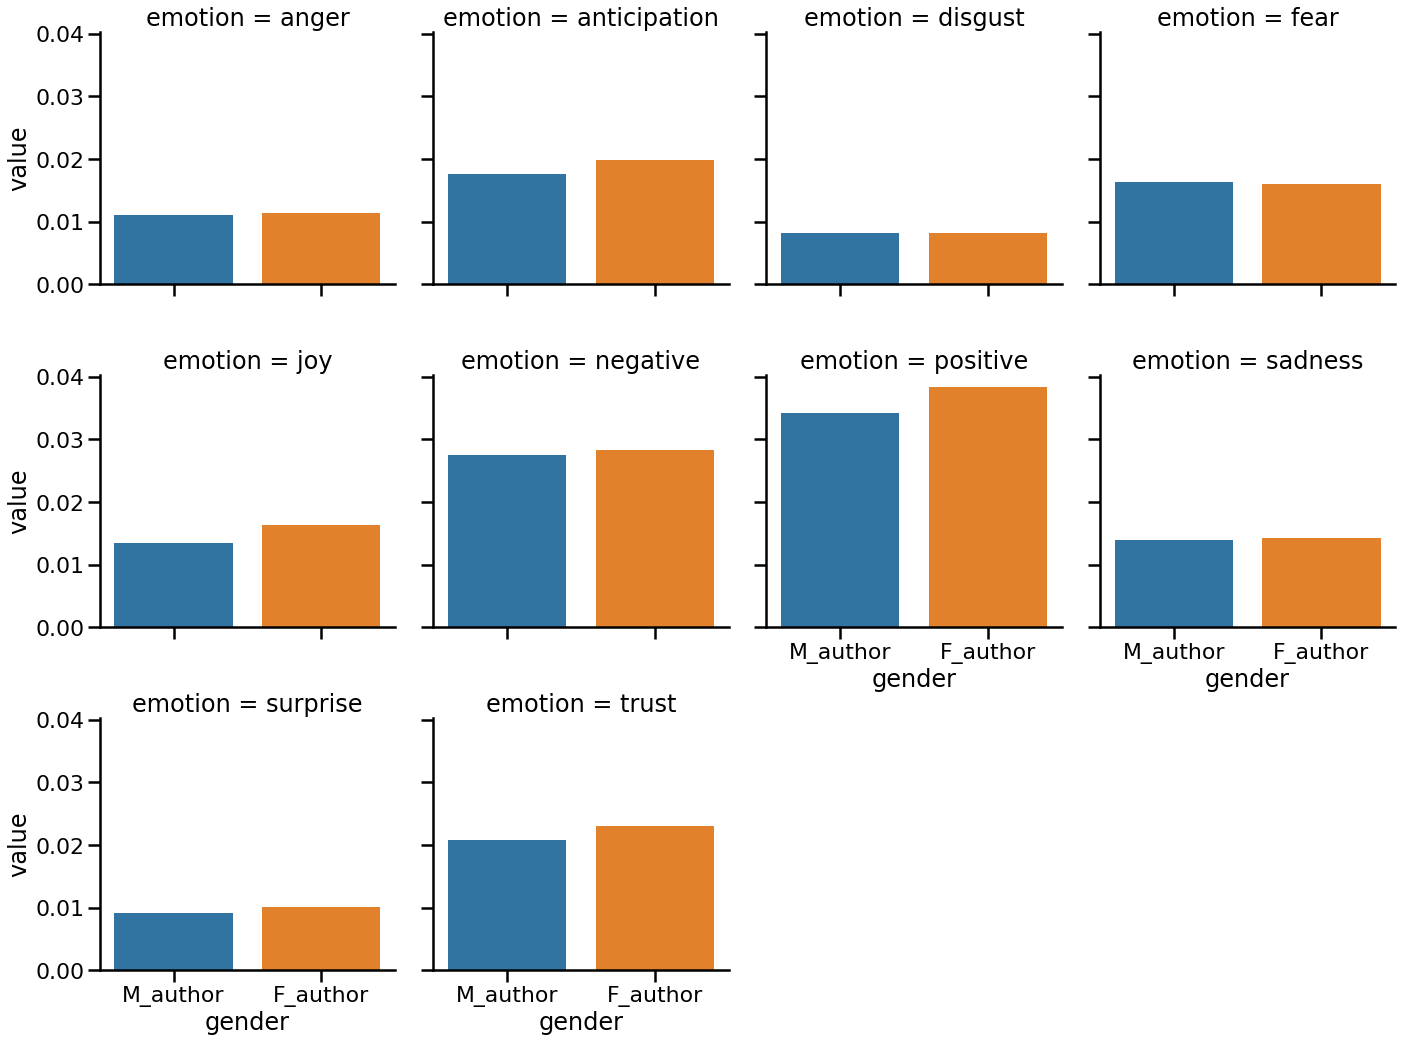

In [40]:
g = visualize_emotion_scores(final_dict)

In [41]:
features = data.drop(['owner','check_1','check_2','gender','title','filename','author_surname','author_givenname','genre', 'source_url', 'downloads', 'dFemale'], axis =1) #setting features to look at (by dropping unwanted ones)
target = data['gender'] #setting target we want to look at (y var)
target = target.astype('float') # making target into float

In [42]:
# from https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
model = ExtraTreesClassifier()
model.fit(features,target)
# print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=features.columns)
print(feat_importances.nlargest(10))
top = (feat_importances.nlargest(10).index) #variable holding the indexes (the label names of the 10 most important features)

horror          0.093540
dHorror         0.081226
joy             0.065623
birth_year      0.055303
country         0.049154
year            0.048292
anticipation    0.047431
age             0.043502
surprise        0.034426
positive        0.032349
dtype: float64


In [43]:
scaler = StandardScaler()
features = scaler.fit_transform(features) # normalizing the scale for looking at features 

In [44]:
classifiers = { # for classification models
    'kNN': KNeighborsClassifier(),
    'Decision tree':DecisionTreeClassifier(),
    'Logit':LogisticRegression(),
    'Random forest':RandomForestClassifier()
}
scores = {} 
for i in classifiers: 
    scores[i] = cross_validate( 
        classifiers[i], 
        features, 
        target,
        cv=10,
        scoring=['accuracy'] 
    )
compare_scores(scores) #using compare scores (given from class) and cross validation to see the accuracy of models

,fit_time,score_time,test_accuracy
kNN,0.000972,0.001773,0.668681
Decision tree,0.001373,0.000428,0.751648
Logit,0.008940,0.000393,0.735165
Random forest,0.123446,0.007585,0.781868


In [45]:
features_10 = data[list(top)] #using features_10 as the top 10 features 
features_10 = scaler.fit_transform(features_10) #normalizing the features_10 values
classifiers_10 = { 
    'kNN': KNeighborsClassifier(),
    'Decision tree':DecisionTreeClassifier(),
    'Logit':LogisticRegression(),
    'Random forest':RandomForestClassifier()
}
scores_10 = {} 
for i in classifiers_10: 
    scores_10[i] = cross_validate( 
        classifiers_10[i], 
        features_10, 
        target,
        cv=10,
        scoring=['accuracy'] 
    )
compare_scores(scores_10)

,fit_time,score_time,test_accuracy
kNN,0.000882,0.001408,0.793407
Decision tree,0.000954,0.000379,0.735714
Logit,0.006474,0.000549,0.718132
Random forest,0.112016,0.008034,0.787363


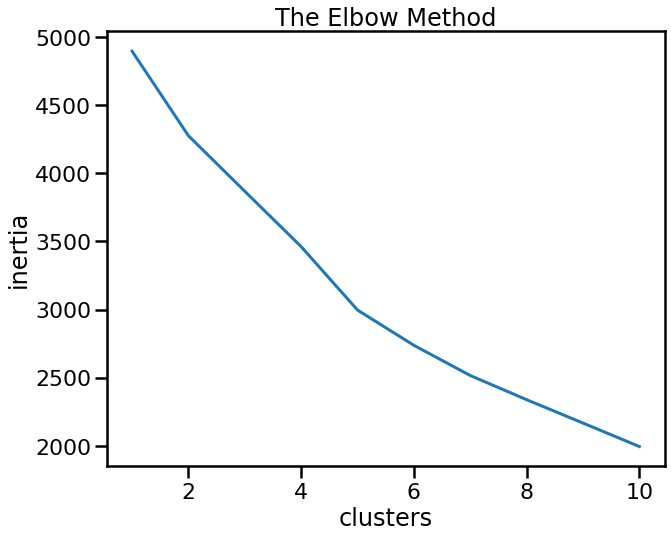

In [46]:
plt.figure(figsize=(10, 8))
interia = []
for i in range(1, 11):
    model = KMeans(n_clusters = i)
    model.fit(features)
    interia.append(model.inertia_)
plt.plot(range(1, 11), interia)
plt.title('The Elbow Method')
plt.xlabel('clusters')
plt.ylabel('inertia') #inertia is also known as within-cluster sum-of-squares and they are supposed to measure centroid distances,
#so in the graph when it starts to level off- it is usually seen as the optimal amount of clusters (this is known as the elbow method)
plt.show() #trying to find the most 

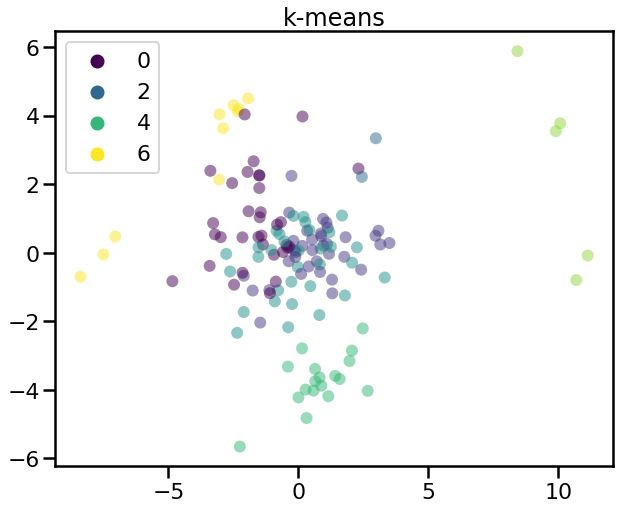

In [47]:
kmeans = KMeans(n_clusters=7) # using K-means 
y_kmeans = kmeans.fit_predict(features)
coordinates = TruncatedSVD().fit_transform(features)
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=coordinates[:, 0], 
    y=coordinates[:, 1],
    hue=y_kmeans,
    alpha=.5,
    palette='viridis',
    linewidth=0
    )
plt.title('k-means')
plt.show()

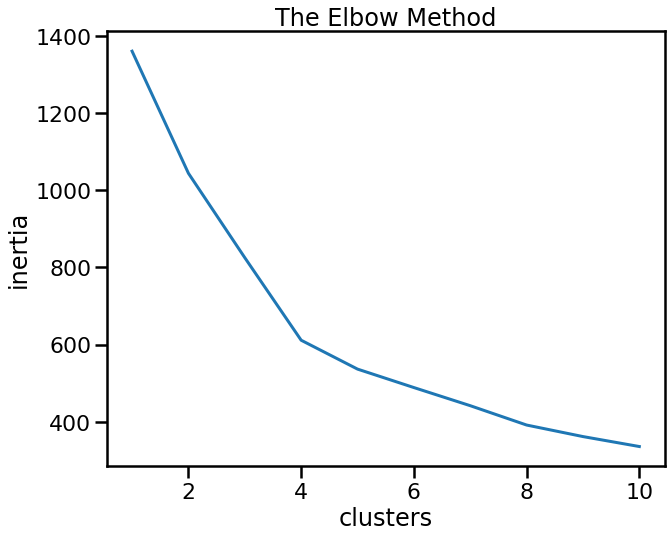

In [48]:
plt.figure(figsize=(10, 8))
interia_10 = []
for i in range(1, 11):
    model = KMeans(n_clusters = i)
    model.fit(features_10)
    interia_10.append(model.inertia_)
plt.plot(range(1, 11), interia_10)
plt.title('The Elbow Method')
plt.xlabel('clusters')
plt.ylabel('inertia')
plt.show() 

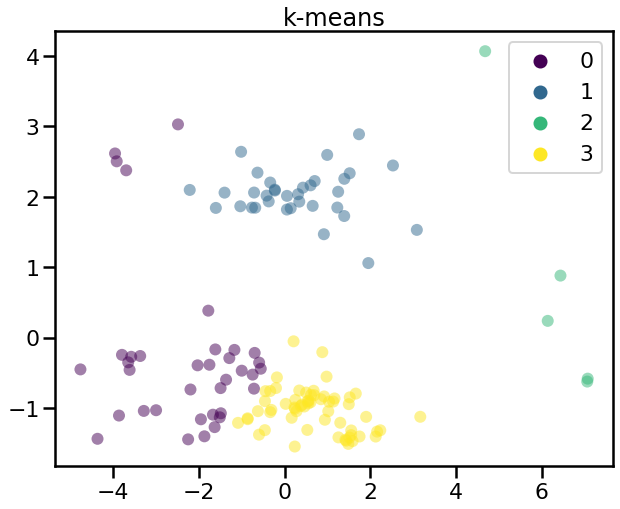

In [49]:
kmeans_10 = KMeans(n_clusters=4) # using K-means 
y_kmeans_10 = kmeans_10.fit_predict(features_10)
coordinates_10 = TruncatedSVD().fit_transform(features_10)
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=coordinates_10[:, 0], 
    y=coordinates_10[:, 1],
    hue=y_kmeans_10,
    alpha=.5,
    palette='viridis',
    linewidth=0
    )
plt.title('k-means')
plt.show()

# 4. Results and discussion

We first tried Vader sentiment analysis and got very polarized compound scores. By definition, 
compound score is a ‘normalized, weighted composite score computed by summing the valence scores 
of each word in the lexicon, adjusted according to the rules, and then normalized 
to be between -1 (most extreme negative) and +1 (most extreme positive).

So, we decided not to use the scores generated from Vader method because looking at the extreme compound values 
and positive/negative composition together, the compound score are not very informational and accurate. 

Then we used the emolex provided in class and the result makes more sense, so we add the emotion values from 
emolex into our dataframe as our indicator. 


## OLS Regression Results and Discussion

For each sentiment measure (positive composition, anticipation, joy, surprise, trust, and fear emolex), we have two specifications. Specification 1 checks the scale and significance of the author's age, gender, and literature periods on the sentiment measure. In addition to the independent variables in Specification 1, Specification 2 check the scale and significance of the war period. That is, a dummy variable indicates if it is in the war period when the author originally published the book. We control genre (dummy variables equal to 1 if the novel's genre is science fiction, horror, detective, respectively), adaptation, point of view (dummy variables equal to 1 if it's the first person), and language (dummy variables equal to 1 if the novel is in English).

* 'Positive' Composition (model specification positive_1 and positive_2)

    Both results show that the positive sentiment measure significantly increases as the author getting older (p-value < 0.1%). The positive sentiment measure also significantly increases if the author is female (p-value < 1%). Interestingly, we find as the literature period gets closer to the current era, the positive sentiment measure decreases gradually. It implies, in our sample, authors tend to use less positive words as time goes by. That is, compare to the novels published between 1902-1913 (non-classified literature period according to the [reference](https://mc.libguides.com/eng/literaryperiods)), on average in positive sentiment measure, the Romantic Period is 1.2% higher, the Victorian Period is 0.6% higher, the Modern Period is only about 0.01-0.03% higher (insignificant), and the Post-Modern(1945-) is 1.3% lower. We do not find any significant results for the war period.

* 'Anticipation' Emolex (model specification anticipation_1 and anticipation_2)

    Both results show that the anticipation sentiment measure significantly increases as the author getting older (p-value < 0.1%). The anticipation sentiment measure also significantly increases if the author is female (p-value < 0.1%). Interestingly, we find as the literature period gets closer to the current era, the anticipation sentiment measure decreases gradually. It implies, in our sample, authors tend to use less anticipating words as time goes by. That is, compare to the novels published between 1902-1913 (non-classified literature period according to the [reference](https://mc.libguides.com/eng/literaryperiods)), on average in anticipation sentiment measure, the Romantic Period is 0.5% higher, the Victorian Period is 0.2% higher, the Modern Period is only about 0.04-0.1% higher (insignificant), and the Post-Modern(1945-) is 0.5% lower. Again, We do not find any significant results for the war period.
    
* 'Joy' Emolex (model specification joy_1 and joy_2)

    Both results show that the joy sentiment measure significantly increases as the author getting older (p-value < 0.1%). The joy sentiment measure also significantly increases if the author is female (p-value < 0.1%). Interestingly, we find as the literature period gets closer to the current era, the joy sentiment measure decreases gradually. It implies, in our sample, authors tend to use less joyful words as time goes by. That is, compare to the novels published between 1902-1913 (non-classified literature period according to the [reference](https://mc.libguides.com/eng/literaryperiods)), on average in joy sentiment measure, the Romantic Period is 0.6% higher, the Victorian Period is 0.3% higher, the Modern Period is only about 0.02-0.08% higher (insignificant), and the Post-Modern(1945-) is 0.7% lower. We do not find any significant results for the war period.

* 'Trust' Emolex (model specification trust_1 and trust_2)

    Both results show that the trust sentiment measure significantly increases as the author getting older (p-value < 0.1%). The trust sentiment measure also significantly increases if the author is female (p-value < 3%). Interestingly, again, we find as the literature period gets closer to the current era, the trust sentiment measure decreases gradually. It implies, in our sample, authors tend to use less trustful words as time goes by. That is, compare to the novels published between 1902-1913 (non-classified literature period according to the [reference](https://mc.libguides.com/eng/literaryperiods)), on average in positive sentiment measure, the Romantic Period is 0.7% higher, the Victorian Period is 0.4% higher, the Modern Period is only about 0.1-0.2% higher (insignificant), and the Post-Modern(1945-) is 0.6% lower. We do not find any significant results for the war period.
    
* 'Surprise' Emolex (model specification surprise_1 and surprise_2)

    Both results show that the surprise sentiment measure significantly increases as the author getting older (p-value < 2.5%). The surprise sentiment measure also significantly increases if the author is female (p-value < 1.5%). As the literature period gets closer to the current era, we do not find the surprise sentiment measure decreases gradually. Compare to the novels published between 1902-1913 (non-classified literature period according to the [reference](https://mc.libguides.com/eng/literaryperiods)), on average in positive sentiment measure, only the Post-Modern(1945-) is 0.16% lower. The rest literature periods show insignificant structural breaks. Again, no significant results for the war period.
    
* 'Fear' Emolex (model specification fear_1 and fear_2) and other measures (Negative, Anger, Disgust, and Sadness)

    For the group of negative sentiment measures, including Negative, Fear, Anger, Disgust, and Sadness, we do not see significant results under the 10% confidence level. These regression results are very close to the model specification fear_1 and fear_2, in terms of sign and significance. This finding is counterintuitive and surprising. For instance, we have seen some famous poets （i.e. Lawrence Binyon） or painters (i.e., Pablo Picasso) express their negative feelings strongly in their work, especially during the war period. But this seems not obvious for the novelists in our sample.




Overall, using the metadata provided in the INFO6350 PS7 and hand-collected biographical data, we see significant impacts of the author's age when first publish the novel, the author's gender, and literature periods on positive sentiment measures, including 'positive' composition, 'anticipation', 'joy', 'surprise', and 'trust' emolex. In particular, authors tend to write more positive as they getting older. Female novelists use more positive words than male novelists. We do not see these significant impacts when using negative sentiment measures, such as 'negative' composition, 'fear', 'anger', 'disgust', and 'sadness' emolex. Furthermore, based on the novels in our sample, we do not see a statistical-significant change in the novelists' sentiment in war. Last but not least, for the non-classified literature period (1902-1913), according to the [reference](https://mc.libguides.com/eng/literaryperiods), given the insignificant structural changes (the coefficients of dModernP) in all the ten sentiment measures, we see it is closer to the Modern Period (1914-1945). 


## Classification and Clustering Results and Discussion: 
Looking at the results, it is possible to see that female authors tend to use more sentiment driven words more frequently, and have a significant gap in the use of more "positive" sentiments (such as joy, trust, and positive). Due to this seeming relationship between positive sentiments and female authors, I thought it would be a highly important feature in determining gender, however, it seems that the horror features is the most important variable in predicting gender. This being said, after normalizing the scale, and running for different classifiers on the features and target (both top10 and all numeric features), none of the classifiers were able to above an accuracy of .8. The Random Forest Classifier did the best, however, without measuring a baseline, we cannot conclude whether this classifier necessarily did a good job since these accuracy values should be used comparatively (RFC did do relatively well when compared to other classifiers). Moving forward to clustering, I wanted to find the optimal amount of clusters (rather than user-input), and when using the elbow method (with inertia- explained in comments above), it did not do a great job identifying when inertia levels off. However, I just assumed 7 clusters was optimal since it looked like it leveled a little off there, and when inputting 7 clusters for k-means, the clustering seemed all over the place. The top 10 clustering did a lot better, and it seems to have sensible performance for clustering.

# 5. Reflection

## Classification and Clustering Reflection: 
Reflecting on the results of the sentiment analysis visualization, makes me wonder if we did not scale the sentiments correctly. It seems that, overwhelmingly so, that the female authors tended to have more sentiments- maybe that means female authors are more expressive? In theory, I feel that our methods for sentiment analysis (where it takes each book's sentiments/# of sentences and adding up each sentiment per author's gender and dividing by the count of novels per gender) made sense; it could be possible the lengths of the novels could effect the results. It might have been more reasonable to divide the sentiments by the number of sentences within list(M_author & F_author). However, when we are looking at the regression analysis- we can see that female authors indeed did use more positive sentiments, so it could be said the female authors we saw in this corpus list tended to use more positive sentiments (but we can't make any larger claims since this is too small of a sample size). 

Another point for reflection would be about the classifications. I think the results mostly speak for themselves, and as I stated above, it is hard to tell the comparative performance vs baseline, but good at telling the relative performance vs other classifiers. I would also like to point out, for this classifications we targeted gender, but there is opportunity to analyze other variables, we just did not. Finally, reflecting on the clustering is also something important to note. The clustering, as mentioned above, seems to be all over the place. There must have been some problem with either the features we were looking at or maybe the data itself. Maybe there were too many features to look at, and maybe that cause too much white noise interference, which lead to poor performance. I think this can be seen when comparing to clustering for the top 10 features- where the clustering is a lot more digestible as well as the inertia graph. We did not analyze the contents of each cluster, but just by looking at the visual performance, it seems that the top10 features did a lot better. 

# 6. Responsibility and resources consulted

* Literature Period: English Literature: Literary Periods & Genres https://mc.libguides.com/eng/literaryperiods
* Feature importance: https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

### Responsibility (by student) 
* Frances: 
* Haokun: 
* Joshua: classification, clustering, and debugging 